# Linear Algebra Exercise: Principal Component Analysis

## Background

The **covariance matrix** **C** tells you how different random variables correlated to each other and vary. Large diagonal elements mean high variance in that variable; large off-diagonal elements mean strong correlation between variables.

The eigenvectors of **C** define new orthogonal axes (the "principal components"). The eigenvalues tell you how much variance lies along each axis. By projecting data onto just the top few eigenvectors, you can reduce dimensionality while keeping most of the information.

## Problem Setup

You're analyzing data from a system with 10 correlated sensors. The covariance matrix (already computed from centered data) is:
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Covariance matrix from sensor measurements
C = np.array([
    [4.2, 2.1, 1.8, 0.9, 0.3, 0.2, 0.1, 0.0, -0.1, 0.0],
    [2.1, 3.8, 1.6, 0.8, 0.4, 0.1, 0.2, 0.1, 0.0, -0.1],
    [1.8, 1.6, 3.5, 1.2, 0.6, 0.3, 0.1, 0.0, 0.1, 0.0],
    [0.9, 0.8, 1.2, 2.8, 0.9, 0.4, 0.2, 0.1, 0.0, 0.1],
    [0.3, 0.4, 0.6, 0.9, 2.2, 0.7, 0.3, 0.2, 0.1, 0.0],
    [0.2, 0.1, 0.3, 0.4, 0.7, 1.8, 0.5, 0.3, 0.2, 0.1],
    [0.1, 0.2, 0.1, 0.2, 0.3, 0.5, 1.5, 0.4, 0.3, 0.2],
    [0.0, 0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 1.2, 0.4, 0.3],
    [-0.1, 0.0, 0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 1.0, 0.5],
    [0.0, -0.1, 0.0, 0.1, 0.0, 0.1, 0.2, 0.3, 0.5, 0.9]
])

# Sample measurement in the original 10D space
x = np.array([2.5, -1.3, 0.8, 1.2, -0.5, 0.3, -0.2, 0.4, 0.1, -0.3])
```

---

## Part 1: Principal Component Analysis

### Task 1.1: Eigenvalue Decomposition

Compute the eigenvalues and eigenvectors of the covariance matrix. Store the eigenvalues in descending order and arrange the eigenvectors accordingly in a matrix **V**.

---

### Task 1.2: Scree Plot

Create a scree plot: plot the eigenvalues in descending order. 

Answer the following:
- How many principal components would you keep to capture 90% of the variance? 
- How many for 95%?

**Hint:** Total variance = sum of all eigenvalues. Cumulative variance fraction = (sum of first k eigenvalues) / (total variance)

### Task 1.3: Projection onto PC Basis

Project the measurement **x** onto the principal component basis.

- Form a matrix **V** whose columns are the eigenvectors (sorted by eigenvalue, largest first)
- Compute the projection: **z** = **V**ᵀ**x**

The vector **z** contains the coordinates of your measurement in the PC basis.

### Task 1.4: Dimensionality Reduction and Reconstruction

Perform dimensionality reduction:

1. Keep only the first 3 components of **z** (call this **z₃**)
2. Reconstruct an approximation of the original measurement using: 
   $$\mathbf{x}_{\text{approx}} = \mathbf{V}_3 \mathbf{z}_3$$
   where **V₃** is the matrix containing only the first 3 eigenvectors (first 3 columns of **V**)
3. Compute the reconstruction error: ||**x** - **x_approx**|| (Euclidean norm, use `np.linalg.norm`)


## Part 2: Linear Systems

### Task 2.1: Sensor Calibration Problem

Suppose you want to express a target measurement **b** as a linear combination of your sensor readings. You need to find coefficients **α** such that:

$$\mathbf{C} \boldsymbol{\alpha} = \mathbf{b}$$

where **b** is given by:
```python
b = np.array([3.0, 2.5, 2.0, 1.5, 1.0, 0.8, 0.6, 0.4, 0.3, 0.2])
```

**a)** Solve this linear system using `scipy.linalg.solve` to find **α**.

**b)** Verify your solution by computing **C α** and comparing it to **b**.
```python

### Task 2.2: BONUS - Gauss Elimination (without pivoting)

Implement your own Gauss elimination function (without pivoting) to solve the same system **C α = b**.

In [1]:
# Linear Algebra Exercise: Principal Component Analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Covariance matrix from sensor measurements
C = np.array([
    [4.2, 2.1, 1.8, 0.9, 0.3, 0.2, 0.1, 0.0, -0.1, 0.0],
    [2.1, 3.8, 1.6, 0.8, 0.4, 0.1, 0.2, 0.1, 0.0, -0.1],
    [1.8, 1.6, 3.5, 1.2, 0.6, 0.3, 0.1, 0.0, 0.1, 0.0],
    [0.9, 0.8, 1.2, 2.8, 0.9, 0.4, 0.2, 0.1, 0.0, 0.1],
    [0.3, 0.4, 0.6, 0.9, 2.2, 0.7, 0.3, 0.2, 0.1, 0.0],
    [0.2, 0.1, 0.3, 0.4, 0.7, 1.8, 0.5, 0.3, 0.2, 0.1],
    [0.1, 0.2, 0.1, 0.2, 0.3, 0.5, 1.5, 0.4, 0.3, 0.2],
    [0.0, 0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 1.2, 0.4, 0.3],
    [-0.1, 0.0, 0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 1.0, 0.5],
    [0.0, -0.1, 0.0, 0.1, 0.0, 0.1, 0.2, 0.3, 0.5, 0.9]
])

# Sample measurement in the original 10D space
x = np.array([2.5, -1.3, 0.8, 1.2, -0.5, 0.3, -0.2, 0.4, 0.1, -0.3])


 Eigenvalues (descending order):
[8.29539803 3.48356981 2.34084437 1.9165166  1.84215036 1.61017456
 1.19886089 1.00858815 0.77963206 0.42426516]


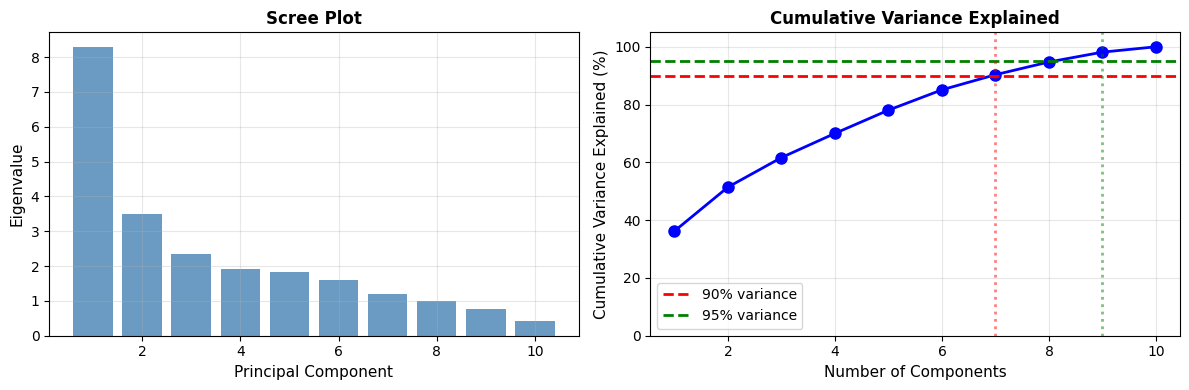

ANSWERS:
Number of components for 90% variance: 7
Number of components for 95% variance: 9

 Variance explained by each component:
PC1: 36.22% cumulative 36.22%
PC2: 15.21% cumulative 51.44%
PC3: 10.22% cumulative 61.66%
PC4:  8.37% cumulative 70.03%
PC5:  8.04% cumulative 78.07%
PC6:  7.03% cumulative 85.10%
PC7:  5.24% cumulative 90.34%
PC8:  4.40% cumulative 94.74%
PC9:  3.40% cumulative 98.15%
PC10:  1.85% cumulative 100.00%

 Original measurement x:
[ 2.5 -1.3  0.8  1.2 -0.5  0.3 -0.2  0.4  0.1 -0.3]

 Projection onto PC basis (z = V^T x):
[-1.48050467  0.03761136  0.72715491 -2.53792488  0.60108772 -0.65457392
  0.25474629  0.14183616  0.61359347  0.49557116]

 Note: The first few components have the largest magnitudes,
corresponding to the directions of maximum variance.
Original measurement x:
[ 2.5 -1.3  0.8  1.2 -0.5  0.3 -0.2  0.4  0.1 -0.3]

 Reconstructed measurement x_approx (using 3 PCs):
[ 0.74935692  0.5450377   1.00124816  0.77969435  0.25924478 -0.09179371
 -0.241745

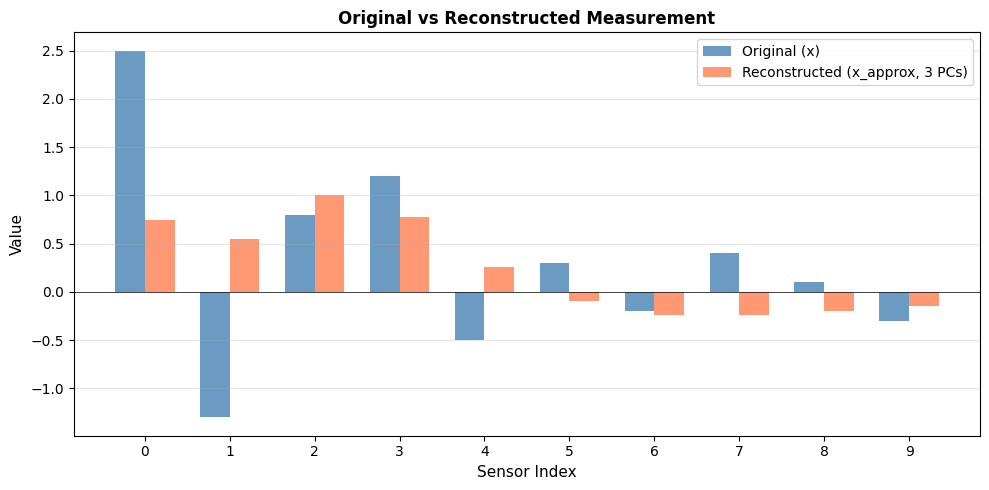


 Variance preserved with 3 PCs: 61.66%


In [3]:
# %% [markdown]
# ---
# ## Part 1: Principal Component Analysis

# %% [markdown]
# ### Task 1.1: Eigenvalue Decomposition

# %%
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = linalg.eigh(C)

# Sort in descending order (eigh returns ascending by default)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Store in matrix V (columns are eigenvectors)
V = eigenvectors

print("\n Eigenvalues (descending order):")
print(eigenvalues)

#print("\n Shape of V:", V.shape)
#print("\n First eigenvector (V[:, 0]):")
#print(V[:, 0])

# %% [markdown]
# ### Task 1.2: Scree Plot

# %%
# Calculate total variance and cumulative variance
total_variance = np.sum(eigenvalues)
cumulative_variance = np.cumsum(eigenvalues)
variance_ratio = cumulative_variance / total_variance

# Find number of components for 90% and 95% variance
n_components_90 = np.argmax(variance_ratio >= 0.90) + 1
n_components_95 = np.argmax(variance_ratio >= 0.95) + 1

# Create scree plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot eigenvalues
ax1.bar(range(1, 11), eigenvalues, color='steelblue', alpha=0.8)
ax1.set_xlabel('Principal Component', fontsize=11)
ax1.set_ylabel('Eigenvalue', fontsize=11)
ax1.set_title('Scree Plot', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot cumulative variance
ax2.plot(range(1, 11), variance_ratio * 100, 'bo-', linewidth=2, markersize=8)
ax2.axhline(y=90, color='r', linestyle='--', linewidth=2, label='90% variance')
ax2.axhline(y=95, color='g', linestyle='--', linewidth=2, label='95% variance')
ax2.axvline(x=n_components_90, color='r', linestyle=':', alpha=0.5, linewidth=2)
ax2.axvline(x=n_components_95, color='g', linestyle=':', alpha=0.5, linewidth=2)
ax2.set_xlabel('Number of Components', fontsize=11)
ax2.set_ylabel('Cumulative Variance Explained (%)', fontsize=11)
ax2.set_title('Cumulative Variance Explained', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 105])

plt.tight_layout()
plt.show()


print("ANSWERS:")
print("Number of components for 90% variance:", n_components_90)
print("Number of components for 95% variance:", n_components_95)
print("\n Variance explained by each component:")
for i in range(len(eigenvalues)):
    cumul = variance_ratio[i]
    var_frac = eigenvalues[i]/total_variance
    print(f"PC{i+1}: {var_frac*100:5.2f}% cumulative {cumul*100:5.2f}%" )


# %% [markdown]
# ### Task 1.3: Projection onto PC Basis

# %%
# Project x onto the PC basis (@ is scalar or matrix-vector product, same as np.dot)
z = V.T @ x

print("\n Original measurement x:")
print(x)
print("\n Projection onto PC basis (z = V^T x):")
print(z)
print("\n Note: The first few components have the largest magnitudes,")
print("corresponding to the directions of maximum variance.")


# %% [markdown]
# ### Task 1.4: Dimensionality Reduction and Reconstruction

# %%
# Keep only first 3 components
z3 = z[:3]
V3 = V[:, :3]

# Reconstruct
x_approx = V3 @ z3

# Compute reconstruction error
reconstruction_error = np.linalg.norm(x - x_approx)

print("Original measurement x:")
print(x)
print("\n Reconstructed measurement x_approx (using 3 PCs):")
print(x_approx)
print(f"\n Reconstruction error: ||x - x_approx|| = {reconstruction_error:.6f}")

# Visualize the comparison
fig, ax = plt.subplots(figsize=(10, 5))
indices = np.arange(10)
width = 0.35

ax.bar(indices - width/2, x, width, label='Original (x)', alpha=0.8, color='steelblue')
ax.bar(indices + width/2, x_approx, width, label='Reconstructed (x_approx, 3 PCs)', 
       alpha=0.8, color='coral')
ax.set_xlabel('Sensor Index', fontsize=11)
ax.set_ylabel('Value', fontsize=11)
ax.set_title('Original vs Reconstructed Measurement', fontsize=12, fontweight='bold')
ax.set_xticks(indices)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calculate what fraction of variance is preserved
variance_preserved = variance_ratio[2]  # 3rd component (0-indexed)
print(f"\n Variance preserved with 3 PCs: {variance_preserved*100:.2f}%")

In [37]:
def linear_solve_gauss(A,b):

    # Solve linear system Ax = b via 
    # Gauss elimination

    demomode = False
    
    N = len(b)
    
    for i in range(N):
        #print(i)
        
        # Normalize diagonal to 1.
        fact = A[i,i]
        A[i,:] /= fact
        b[i] /= fact
        
        for j in range(i+1,N):
            # Subract upper rows, multiplied by suitable 
            # factor, to generate an upper diagonal matrix
            # At the end of each loop, column i (set by loop above) 
            # has become (1, 0, .... , 0)  
            fact = A[j,i]
            A[j,:] -= fact*A[i,:]
            b[j] -= fact*b[i]
        
        if (demomode):
            print( ' ' )
            print('i = ', i)
            print('A=', '\n', A)
            
    # Checking that I did it right
    if (demomode):
        print(' ')
        print('After Gauss elimination')
        print('A = ', '\n', A)
        print( ' ' )
        print('b = ', b)
        print( ' ')
    
   
    # Final step: backsubstitution
    
    # Initialize solution vector
    x = np.zeros(len(b))    
    # Gets last solution, x_(N-1)
    x[N-1] = b[N-1]/A[N-1,N-1]
    
    # Proceed backward, line by line
    for i in range(N-2,-1,-1):
        v = np.dot(A[i,i+1:N],x[i+1:N])
        #if (i==1): print(i, i+1, N-1, A[i,i+1:N])
        x[i] = (b[i] - v)/A[i,i]
    
    return x

In [38]:
b = np.array([3.0, 2.5, 2.0, 1.5, 1.0, 0.8, 0.6, 0.4, 0.3, 0.2])

alpha = linear_solve_gauss(C,b)

print(alpha)

[1.08883319 1.87384175 1.48936548 1.16190342 0.73048027 0.5993331
 0.46916287 0.29386138 0.20665016 0.2       ]


In [39]:
alpha = linalg.solve(C,b)

print(alpha)

[1.08883319 1.87384175 1.48936548 1.16190342 0.73048027 0.5993331
 0.46916287 0.29386138 0.20665016 0.2       ]
